In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load withinFile_df, withinRepo_df and acrossRepo_df from pickle files (../parsers/parsed/)
withinFile_df = pd.read_pickle("../../parsers/parsed/withinFile.pkl")
withinRepo_df = pd.read_pickle("../../parsers/parsed/withinRepo.pkl")
acrossRepo_df = pd.read_pickle("../../parsers/parsed/acrossRepos_df.pkl")

In [3]:
# get counts of each type of change
withinFile_counts = withinFile_df['clonePairCount'].value_counts()
withinRepo_counts = withinRepo_df['clonePairCount'].value_counts()
acrossRepo_counts = acrossRepo_df['acrossRepoPairsCount'].value_counts()
print( "withinFile_counts: ", withinFile_counts, "\n\n", "withinRepo_counts: ", withinRepo_counts, "\n\n", "acrossRepo_counts: ", acrossRepo_counts)

withinFile_counts:  clonePairCount
1.0     895
3.0     122
6.0      45
10.0     17
15.0      4
45.0      2
55.0      1
28.0      1
78.0      1
36.0      1
66.0      1
Name: count, dtype: int64 

 withinRepo_counts:  clonePairCount
1      1048
3       172
6        71
4        34
2        34
10       31
15       21
28       10
21        9
5         9
12        5
9         5
8         5
45        4
24        3
20        3
36        3
55        3
26        2
40        2
34        1
25        1
31        1
7         1
16        1
32        1
50        1
19        1
23        1
180       1
Name: count, dtype: int64 

 acrossRepo_counts:  acrossRepoPairsCount
1       799
3       156
2        98
6        73
9        41
       ... 
1547      1
66        1
64        1
168       1
11        1
Name: count, Length: 108, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import pandas as pd


# preserve only top 4 of the counts and sum the rest together 
withinFile_counts = withinFile_counts.head(4)
withinRepo_counts = withinRepo_counts.head(4)
acrossRepo_counts = acrossRepo_counts.head(4)

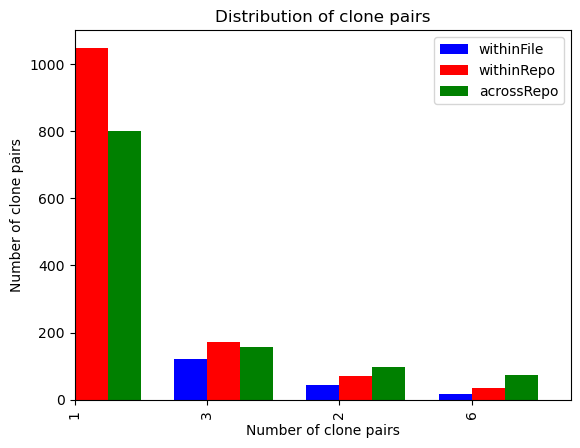

In [5]:
# plot the distribution of clone pairs
fig, ax = plt.subplots()
withinFile_counts.plot(kind='bar', ax=ax, color='blue', position=1, width=0.25)
withinRepo_counts.plot(kind='bar', ax=ax, color='red', position=0, width=0.25)
acrossRepo_counts.plot(kind='bar', ax=ax, color='green', position=-1, width=0.25)
plt.xlabel('Number of clone pairs')
plt.ylabel('Number of clone pairs')
plt.title('Distribution of clone pairs')
plt.legend(['withinFile', 'withinRepo', 'acrossRepo']) 
plt.show()

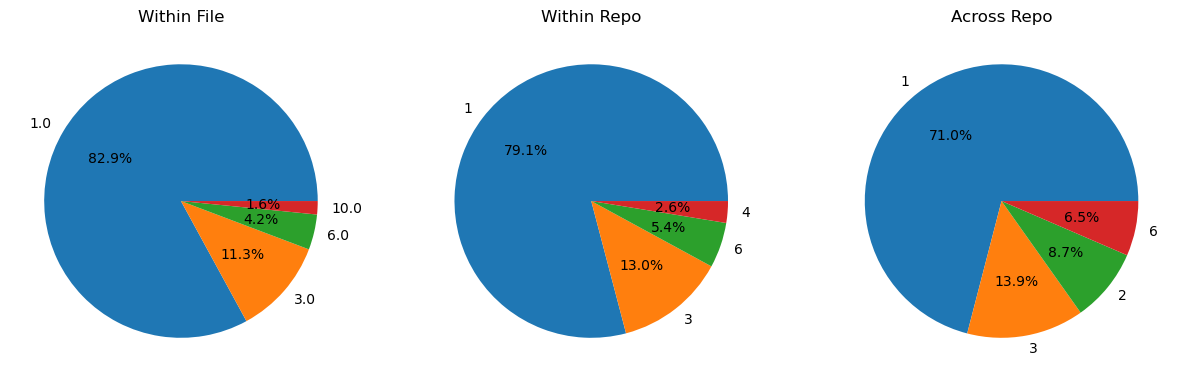

In [6]:
# plot the counts as pie charts
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].pie(withinFile_counts, labels=withinFile_counts.index, autopct='%1.1f%%')
axs[0].set_title('Within File')
axs[1].pie(withinRepo_counts, labels=withinRepo_counts.index, autopct='%1.1f%%')
axs[1].set_title('Within Repo')
axs[2].pie(acrossRepo_counts, labels=acrossRepo_counts.index, autopct='%1.1f%%')
axs[2].set_title('Across Repo')
plt.show()

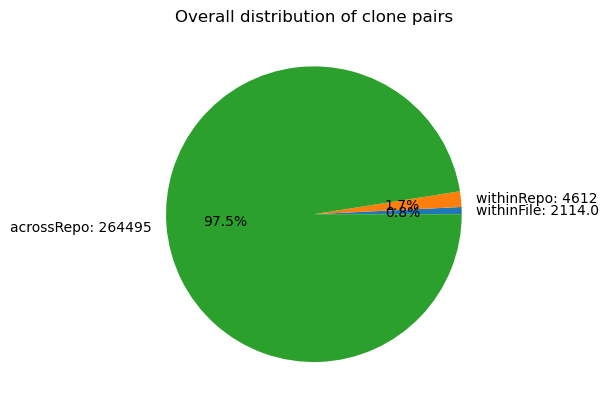

In [7]:
withinFile_clonePairsTotal = withinFile_df['clonePairCount'].sum()
withinRepo_clonePairsTotal = withinRepo_df['clonePairCount'].sum()
acrossRepo_clonePairsTotal = acrossRepo_df['acrossRepoPairsCount'].sum()

# plot pie chart
fig, ax = plt.subplots()
ax.pie([withinFile_clonePairsTotal, withinRepo_clonePairsTotal, acrossRepo_clonePairsTotal], labels=[f"withinFile: {withinFile_clonePairsTotal}", f"withinRepo: {withinRepo_clonePairsTotal}", f"acrossRepo: {acrossRepo_clonePairsTotal}"], autopct='%1.1f%%')
ax.set_title('Overall distribution of clone pairs')
plt.show()


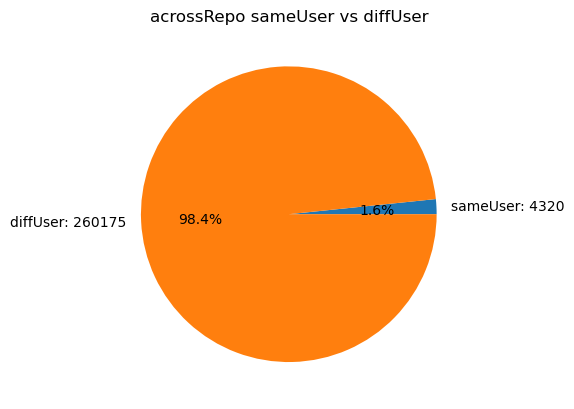

In [8]:
# acrossRepos same user vs different user

acrossRepo_sameUser_df = acrossRepo_df[acrossRepo_df['sameUser'] == True]
acrossRepo_diffUser_df = acrossRepo_df[acrossRepo_df['sameUser'] == False]

acrossRepo_sameUser_clonePairsTotal = acrossRepo_sameUser_df['acrossRepoPairsCount'].sum()
acrossRepo_diffUser_clonePairsTotal = acrossRepo_diffUser_df['acrossRepoPairsCount'].sum()

# plot pie chart
fig, ax = plt.subplots()
ax.pie([acrossRepo_sameUser_clonePairsTotal, acrossRepo_diffUser_clonePairsTotal], labels=[f"sameUser: {acrossRepo_sameUser_clonePairsTotal}", f"diffUser: {acrossRepo_diffUser_clonePairsTotal}"], autopct='%1.1f%%')
ax.set_title('acrossRepo sameUser vs diffUser')
plt.show()


In [16]:
# make table of counts for clones in withinFile, withinRepo and acrossRepo (sameUser and diffUser)
withinFile_clonePairsTotal = withinFile_df['clonePairCount'].sum()
withinRepo_clonePairsTotal = withinRepo_df['clonePairCount'].sum()
acrossRepo_clonePairsTotal = acrossRepo_df['acrossRepoPairsCount'].sum()
acrossRepo_sameUser_clonePairsTotal = acrossRepo_sameUser_df['acrossRepoPairsCount'].sum()
acrossRepo_diffUser_clonePairsTotal = acrossRepo_diffUser_df['acrossRepoPairsCount'].sum()

data = {'withinFile': [withinFile_clonePairsTotal], 'withinRepo': [withinRepo_clonePairsTotal], 'acrossRepo': [acrossRepo_clonePairsTotal], 'acrossRepo (sameUser)': [acrossRepo_sameUser_clonePairsTotal], 'acrossRepo (diffUser)': [acrossRepo_diffUser_clonePairsTotal]}
df = pd.DataFrame(data)
df

,withinFile,withinRepo,acrossRepo,acrossRepo (sameUser),acrossRepo (diffUser)
0,2114.0,4612,264495,4320,260175


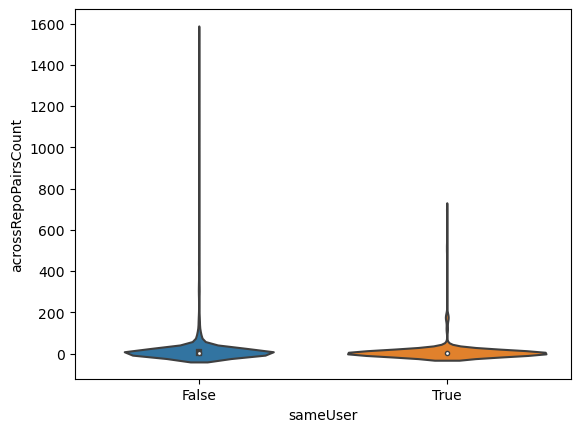

In [10]:
# filter out extreme values
acrossRepo_df_filtered = acrossRepo_df[acrossRepo_df['acrossRepoPairsCount'] < 5000]

# violin plot of acrossRepo sameUser vs diffUser
fig, ax = plt.subplots()
sns.violinplot(data=acrossRepo_df_filtered, x='sameUser', y='acrossRepoPairsCount')
plt.show()
